<a href="https://colab.research.google.com/github/idkwhom/Praktikum-dakmin/blob/main/Tugas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preferensi Makanan orang dari seluruh penjuru dunia

####Business Understanding

###Bisnis Objective
Tujuan dataset ini untuk mengetahui dari berbagai manusia dari penjuru dunia untuk pengebangan produk yang bisa disukai banyak orang,hal ini dapat di capai dengan memahami dengan mengetahui apa yang disukai oleh manusia dari penjuru dunia

###Assess Situation
Situasi bisnis ini dilakukan untuk mendapatkan produk yang disukai banyak orang dari seluruh dunia

###Data Mining Goals
Tujuan diadakan dataset ini untuk mendaptkan produk yang disukai banyak orang dari seluruh dunia

###Project Plan
Rencana proyek untuk mengalisa dataset ini dengan cara

-pengumpulan data:

Survei online: Diterjemahkan ke berbagai bahasa dan disebarluaskan secara global.

Wawancara mendalam: Dilakukan dengan penduduk lokal di berbagai wilayah.

-Analisis Data:

Analisis statistik: Mengidentifikasi pola dan tren dalam preferensi makanan.

Analisis kualitatif: Memahami makna dan konteks di balik preferensi makanan.

Penyajian Data:

Laporan: Menyajikan hasil penelitian dan analisis

# Import Library

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore

**Library untuk Splitting Data**

In [6]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [7]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#DATA UNDERSTANDING




##Collect Initial Data

Data yang saya dapatkan ini bersumber dari kaggle dengan link berikut ini
:https://www.kaggle.com/datasets/vijayashreer/food-preferences

In [ ]:
df= pd.read_csv('ddatafood.csv')
df.head()

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe


#Describe Data





##Informasi Dasar



In [ ]:
df.shape

(288, 8)

Jadi terdapat 288 baris data dan terdapat 8 coloum

##Informasi Lanjutan

In [ ]:
columns_list=df.columns.tolist()
print(columns_list)

['Timestamp', 'Participant_ID', 'Gender', 'Nationality', 'Age', 'Food', 'Juice', 'Dessert']


1. Timestamp:digunakan untuk mengetahui kapan orang mengisi quis tersebut.(date)

2. Participant_ID:Identifikasi partisipan berdasarkan id.(String)

3. Gender:Jenis kelamin.(categorical)

4. Nationalty:Kebangsaan.(categorical)

5. Age:Umur.(Numrical)

6. food:Makanan.(categorical)

7. Juice:Minuman.(categorical)

8. Dessert:makanan penutup.(categorical)




##Informasi Statistik Deskriptif

In [ ]:
deskritif_statistical=df.describe()
display(deskritif_statistical)

,Age
count,288.000000
mean,30.597222
std,11.180383
min,8.000000
25%,24.000000
50%,28.000000
75%,36.250000
max,80.000000


count: Menghitung jumlah row yang terdapat dalam data tersebut ,dalam row tersebut terdapat data sebanyak dua ratus delapan puluh delapan

mean: rata rata dari column age yang bernilai 31

std: merupakan suatu nila yang menentukan persebaran data dan seberapa dekat data-data tersebut dengan mean
yang bernilai 11

min: nilai umur yang paling rendah yang bernilai 8

25%: seperempat dari data age yang ada yang bernilai 24

50%: setengah dari data yang ada di age yang bernilai 28

75%: tiga perempat dari data yang ada di age yang bernilai 36

max: semua yang terdapat di data age yang bernilai 80



#Exploratory Data Analysis

In [ ]:
df=pd.read_csv('ddatafood.csv')


df_Female = df[df['Gender'] == 'Female']
display(df_Female)

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
6,2019/05/07 3:03:48 PM GMT+8,FPS007,Female,Indian,34,Traditional food,Fresh Juice,Yes
8,2019/05/07 3:05:39 PM GMT+8,FPS009,Female,Indian,19,Traditional food,Fresh Juice,Yes
9,2019/05/07 3:06:53 PM GMT+8,FPS010,Female,Indian,16,Western Food,Fresh Juice,Yes
...,...,...,...,...,...,...,...,...
258,2019/05/09 10:04:18 AM GMT+8,FPS259,Female,Indian,42,Traditional food,Fresh Juice,No
259,2019/05/09 10:43:42 AM GMT+8,FPS260,Female,Indian,37,Traditional food,Fresh Juice,Yes
260,2019/05/09 10:47:53 AM GMT+8,FPS261,Female,Indian,46,Traditional food,Fresh Juice,No
261,2019/05/09 3:25:56 PM GMT+8,FPS262,Female,Indian,36,Traditional food,Fresh Juice,Maybe


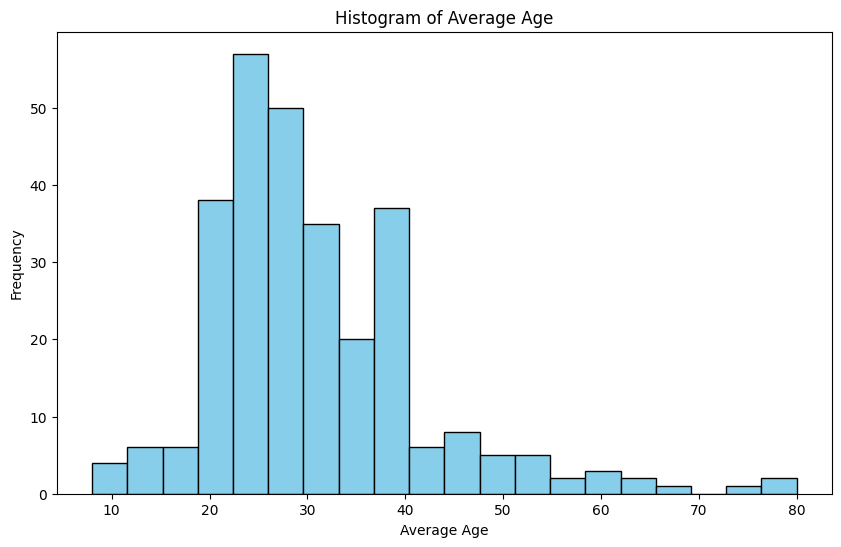

In [ ]:
df = pd.read_csv('ddatafood.csv')
df['average_Age'] = df[['Age']].mean(axis=1)
plt.figure(figsize=(10, 6))
plt.hist(df['average_Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Average Age')
plt.xlabel('Average Age')
plt.ylabel('Frequency')
plt.show()

Berdasarkan data yang ada rata rata umu pembeli dari umur 25-30

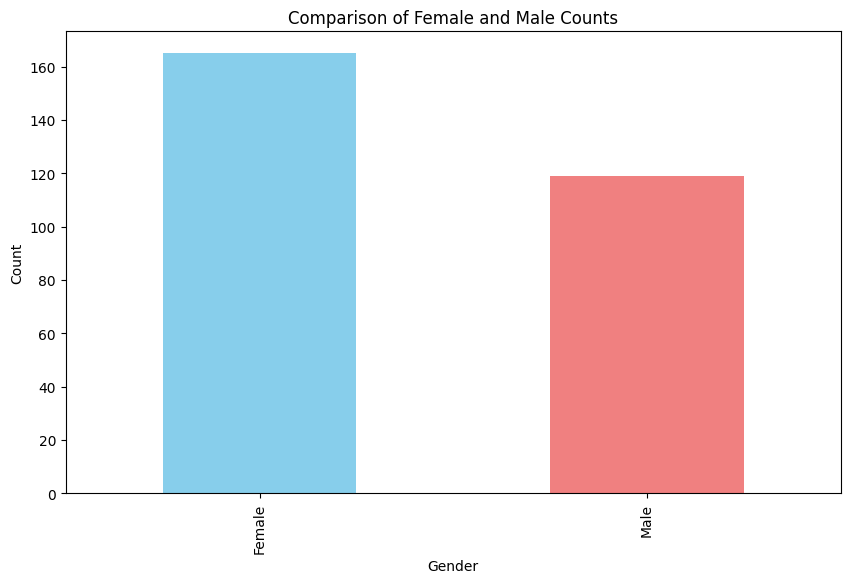

In [ ]:
df = pd.read_csv('ddatafood.csv')
plt.figure(figsize=(10, 6))
df['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Comparison of Female and Male Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


jadi dari data diatas yang bisa kita ambil gender yang paling banyak adalah female

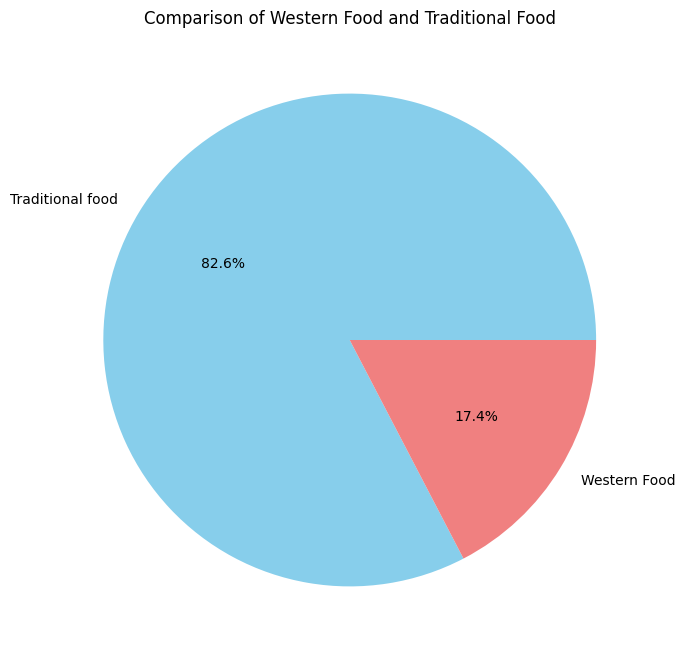

In [ ]:
df = pd.read_csv('ddatafood.csv')
Food_counts = df['Food'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Food_counts, labels=Food_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Comparison of Western Food and Traditional Food')
plt.show()

dari data tersebut sebagian pelanggan memilih traditional food sebagai pilihan mereka

##Kesimpulan

Dari Keseluruhan data data diatas dapat disimpulkan bahwa  dari umur 20 keatas rata rata memilih maakanan traditional food sebagai pilihan mereka.

#Verify Data Quality

##Missing Value

In [ ]:

df = pd.read_csv('ddatafood.csv')


null_counts = df.isnull().sum()


print("Null counts in each column:")
print(null_counts)

Null counts in each column:
Timestamp         0
Participant_ID    0
Gender            4
Nationality       0
Age               0
Food              0
Juice             0
Dessert           0
dtype: int64


jadi terdapat 4 missing value di column gender

##Outliers Values

In [ ]:

df = pd.read_csv('ddatafood.csv')


age_column = df['Age']


z_scores_age = zscore(age_column)


threshold = 3


outliers_age = (abs(z_scores_age) > threshold)


outliers_data = df[outliers_age]
print("Rows with outliers in the 'Age' column:")
print(outliers_data)

Rows with outliers in the 'Age' column:
                       Timestamp Participant_ID  Gender Nationality  Age  \
65   2019/05/07 4:15:14 PM GMT+8         FPS066    Male      Indian   74   
69   2019/05/07 4:17:15 PM GMT+8         FPS070  Female      Indian   80   
73   2019/05/07 4:18:31 PM GMT+8         FPS074  Female      Indian   80   
139  2019/05/07 6:14:39 PM GMT+8         FPS140    Male      Indian   67   
161  2019/05/07 7:51:37 PM GMT+8         FPS162  Female      Indian   65   

                 Food        Juice Dessert  
65   Traditional food  Fresh Juice     Yes  
69   Traditional food  Fresh Juice     Yes  
73   Traditional food  Fresh Juice     Yes  
139  Traditional food  Fresh Juice      No  
161  Traditional food  Fresh Juice      No  


diatas adalah data data yang ditemukan sebagai outliers

##Duplicated Values

In [ ]:
duplicates_all_columns = df[df.duplicated()]
print("Rows with duplicated data across all columns:")
print(duplicates_all_columns)

Rows with duplicated data across all columns:
Empty DataFrame
Columns: [Timestamp, Participant_ID, Gender, Nationality, Age, Food, Juice, Dessert]
Index: []


tidak ada duplicate dari data tersebut

##Inconsistent Values / Noise (Optional)

In [ ]:

df = pd.read_csv('ddatafood.csv')


def find_inconsistent_data(column):

    unique_values = column.unique()


    unexpected_data_types = column.apply(type).unique()

    return {
        'unique_values': unique_values,
        'unexpected_data_types': unexpected_data_types
    }


inconsistent_data_info = {}


for column in df.columns:
    inconsistent_data_info[column] = find_inconsistent_data(df[column])


for column, info in inconsistent_data_info.items():
    print(f"\nColumn: {column}")
    print(f"Unique Values: {info['unique_values']}")
    print(f"Unexpected Data Types: {info['unexpected_data_types']}")


Column: Timestamp
Unique Values: ['2019/05/07 2:59:13 PM GMT+8' '2019/05/07 2:59:45 PM GMT+8'
 '2019/05/07 3:00:05 PM GMT+8' '2019/05/07 3:00:11 PM GMT+8'
 '2019/05/07 3:02:50 PM GMT+8' '2019/05/07 3:03:34 PM GMT+8'
 '2019/05/07 3:03:48 PM GMT+8' '2019/05/07 3:04:37 PM GMT+8'
 '2019/05/07 3:05:39 PM GMT+8' '2019/05/07 3:06:53 PM GMT+8'
 '2019/05/07 3:07:26 PM GMT+8' '2019/05/07 3:07:36 PM GMT+8'
 '2019/05/07 3:07:49 PM GMT+8' '2019/05/07 3:09:06 PM GMT+8'
 '2019/05/07 3:09:47 PM GMT+8' '2019/05/07 3:10:37 PM GMT+8'
 '2019/05/07 3:12:29 PM GMT+8' '2019/05/07 3:13:11 PM GMT+8'
 '2019/05/07 3:18:07 PM GMT+8' '2019/05/07 3:18:21 PM GMT+8'
 '2019/05/07 3:20:06 PM GMT+8' '2019/05/07 3:21:27 PM GMT+8'
 '2019/05/07 3:21:40 PM GMT+8' '2019/05/07 3:22:09 PM GMT+8'
 '2019/05/07 3:24:47 PM GMT+8' '2019/05/07 3:29:38 PM GMT+8'
 '2019/05/07 3:31:17 PM GMT+8' '2019/05/07 3:33:04 PM GMT+8'
 '2019/05/07 3:33:40 PM GMT+8' '2019/05/07 3:42:00 PM GMT+8'
 '2019/05/07 3:42:05 PM GMT+8' '2019/05/07 3:46:10 

untuk inconsistent di semua coloumn
Timestamp:terdapat beberapa str
participant_id:terdapat beberapa str
gender:terdapat beberapa str dan float
nationality:terdapat beberapa str
age:terdapat beberapa int
food:terdapat beberapa str
juice:terdapat beberapa str
dessert:terdapat beberapa str

# DATA CLEANING

## Penanganan Missing Values

### Pengecekan Missing Values

In [ ]:
print((df.isna().sum() / len(df)) * 100)

Timestamp         0.000000
Participant_ID    0.000000
Gender            1.388889
Nationality       0.000000
Age               0.000000
Food              0.000000
Juice             0.000000
Dessert           0.000000
dtype: float64


Berdasarkan data diatas kolom yang kosong hanya satu yaitu kolom Gender.

In [ ]:
df[df['Gender'].isnull()]

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
14,2019/05/07 3:09:06 PM GMT+8,FPS015,NaN,Muslim,27,Traditional food,Fresh Juice,Yes
225,2019/05/08 1:03:16 PM GMT+8,FPS226,NaN,Indian,30,Traditional food,Fresh Juice,Yes
268,2019/05/10 1:09:22 AM GMT+8,FPS269,NaN,Indian,23,Traditional food,Fresh Juice,Yes
277,2019/05/10 1:46:27 AM GMT+8,FPS278,NaN,Indian,26,Traditional food,Fresh Juice,Yes


Data kosong pada kolom gender

### Hapus Missing Values

Tidak ada kolom yang perlu dihapus pada dataset ini karena missing values nya masih dibawah 70% dan hanya perlu diimputasi saja.

### Imputasi Missing Values

Untuk kolom Gender, kita perlu melakukan imputasi karena merupakan fitur yang relevan dalam analisis ini dan jumlah missing valuesnya < 70%. Imputasi dilakukan menggunakan nilai modus karena termasuk kolom kategorikal.



In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

### Pengecekan Ulang

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Timestamp,0.0
Participant_ID,0.0
Gender,0.0
Nationality,0.0
Age,0.0
Food,0.0
Juice,0.0
Dessert,0.0


Berdasarkan data diatas sudah tidak ada kolom yang datanya kosong.

## Penanganan Duplicate Values

In [ ]:
df[df.duplicated()]

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert


Disini kita mengecek apakah ada data yang terduplikat pada dataset kita, karena tidak ada kita tidak perlu melakukan penanganan duplicated values.

## Penanganan Outliers

### Pengecekkan Outliers

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Age,3.819444


Disini kita melakukan pengecekan kolom untuk mengetahui apakah ada outliers atau tidak.

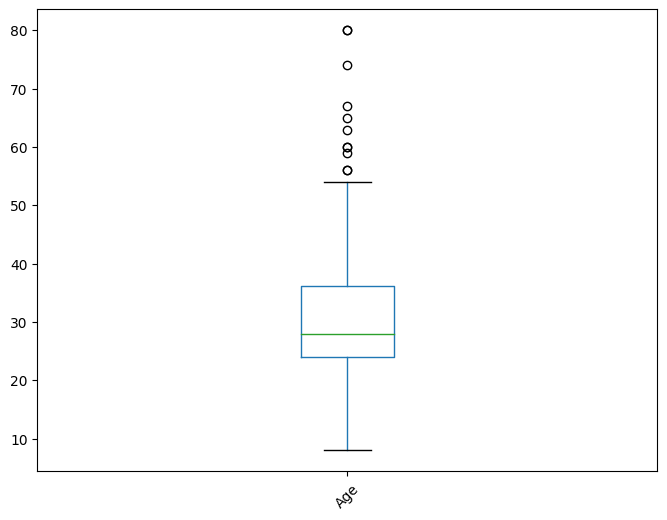

In [ ]:
boxplot = df.boxplot(grid=False, rot=45, figsize=(8, 6))

plt.show()

Bisa dilihat terdapat beberapa outliers pada kolom age yang harus diatasi.

### Hapus Outliers

In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

Melakukan penghapusan baris pada kolom "Age" untuk menangani outliers

### Imputasi Outliers

Kita tidak perlu melakukan imputasi outliers dikarenakan semua outliers sudah ditangani dalam penghapusan outliers.

### Pengecekkan Ulang

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Age,1.805054


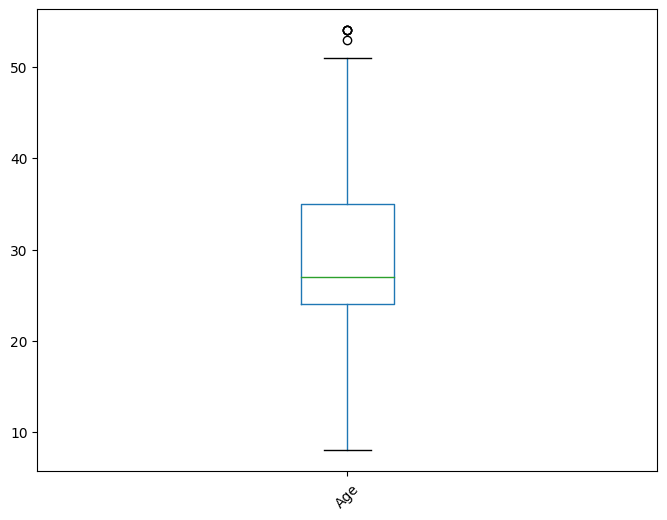

In [ ]:
boxplot = df.boxplot(grid=False, rot=45, figsize=(8, 6))

plt.show()

Setelah dilakukan penghapusan dan imputasi maka outliers pun sudah hilang.

# CONSTRUCT DATA

## Melakukan Rekayasa Fitur (Feature Engineering)

In [ ]:
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 60:
        return 'Adult'
    else:
        return 'Elderly'

df['AgeCategory'] = df['Age'].apply(categorize_age)

Disini kita membuat fitur baru untuk mengkategorikan umur menjadi anak-anak, dewasa dan orang lanjut usia agar mengetahui preferensi makanan mereka.

### Pengecekan Ulang

In [ ]:
df.head()

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert,AgeCategory
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe,Adult
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes,Adult
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe,Adult
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe,Adult
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe,Adult


Bisa dilihat kategori umur untuk partisipan sudah terbuat.

# DATA REDUCTION

## Mengurangi Fitur Yang Kurang Relevan

Disini kita perlu mengurangi data atau kolom yang kurang relevan pada analisis kita.

In [ ]:
df.head()

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert,AgeCategory
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe,Adult
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes,Adult
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe,Adult
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe,Adult
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe,Adult


In [ ]:
df = df.drop(['Timestamp','Participant_ID'], axis = 1)

Disini kita bakal menghapus kolom yang kurang relevan yaitu 'Timestamp','Participant_ID'.

### Pengecekkan Hasil

In [ ]:
df.head()

,Gender,Nationality,Age,Food,Juice,Dessert,AgeCategory
0,Male,Indian,24,Traditional food,Fresh Juice,Maybe,Adult
1,Female,Indian,22,Western Food,Carbonated drinks,Yes,Adult
2,Male,Indian,31,Western Food,Fresh Juice,Maybe,Adult
3,Female,Indian,25,Traditional food,Fresh Juice,Maybe,Adult
4,Male,Indian,27,Traditional food,Fresh Juice,Maybe,Adult


Bisa dilihat pada data diatas kolom Timestamp dan Participant_ID sudah tidak ada.

# DATA TRANSFORMATION

## Mapping

Disini saya bakal melakukan Mapping ke Kolom Gender dan food agar data nya  bisa terbaca di modeling nantinya.

In [ ]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female': 2}).astype(int)
df['Food'] = df['Food'].map({'Traditional food':1, 'Western Food': 2}).astype(int)

## Encoding

Disini saya melakukan Encoding yaitu mengubah semua kolom kategorikal (kolom nationality dan agecategory) menjadi Numerik (biner).

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,Gender,Age,Food,Nationality_Algerian,Nationality_Canadian,Nationality_China,Nationality_Indian,Nationality_Indonesain,Nationality_Indonesia,Nationality_Indonesian,...,Nationality_Seychellois,Nationality_Tanzanian,Nationality_Yemen,Juice_Carbonated drinks,Juice_Fresh Juice,Dessert_Maybe,Dessert_No,Dessert_Yes,AgeCategory_Adult,AgeCategory_Child
0,1,24,1,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,2,22,2,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,1,31,2,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,2,25,1,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
4,1,27,1,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0


# Selecting Model Techniques

proyek ini bertujuan untuk mengidentifikasi produk makanan yang disukai oleh banyak orang dari berbagai belahan dunia. Karena ini melibatkan pemahaman pola dan tren dalam preferensi makanan, model prediktif seperti Naive Bayes, KNN, dan Decision Trees akan lebih cocok untuk digunakan daripada model asosiatif seperti K-means dan Hierarchical Clustering.

Model prediktif seperti Naive Bayes, KNN, dan Decision Trees akan membantu dalam memprediksi preferensi makanan seseorang berdasarkan berbagai faktor seperti gender, usia, dan kewarganegaraan.

#**Inisiasi Variabel untuk menyimpan Dataframe**

In [9]:
df = pd.read_csv('Data_Cleaned.csv')
df.head()

,Gender,Age,Food,Nationality_Algerian,Nationality_Canadian,Nationality_China,Nationality_Indian,Nationality_Indonesain,Nationality_Indonesia,Nationality_Indonesian,...,Nationality_Seychellois,Nationality_Tanzanian,Nationality_Yemen,Juice_Carbonated drinks,Juice_Fresh Juice,Dessert_Maybe,Dessert_No,Dessert_Yes,AgeCategory_Adult,AgeCategory_Child
0,1,24,1,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,2,22,2,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,1,31,2,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,2,25,1,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
4,1,27,1,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0


# Modeling Predict

## Pre-Processing

### Splitting data

In [10]:
x = df.drop('Food', axis=1)
y = df['Food']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Kode ini membagi dataset menjadi dua bagian: variabel x (data tanpa kolom 'Food') dan variabel y (data hanya dengan kolom 'Food'). Ini dilakukan untuk membuat data latih dan data uji dengan rasio 70:30.

### Normalisasi data

In [11]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)


Kode ini dilakukan untuk normalisasi data menggunakan Min-Max Scaler. Normalisasi adalah proses mengubah nilai-nilai dalam dataset sehingga mereka berada dalam rentang yang sama atau memiliki skala yang serupa.

# Build and Train Model

## Gaussian Naive Bayes

In [12]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

ode ini menggunakan algoritma Naive Bayes Gaussian untuk melatih model klasifikasi dengan data latih yang sudah dinormalisasi (x_train_norm) dan label yang sesuai (y_train). Algoritma Naive Bayes memanfaatkan teorema Bayes untuk membuat prediksi berdasarkan probabilitas fitur-fitur yang diberikan kelas tertentu.

K-Nearest Neighbors

In [13]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

Kode ini menggunakan algoritma K-Nearest Neighbors (KNN) untuk melatih model klasifikasi dengan data latih yang sudah dinormalisasi (x_train_norm) dan label yang sesuai (y_train). Algoritma KNN bekerja dengan cara mencari sejumlah k tetangga terdekat dari setiap titik data yang ingin diprediksi, dan kemudian menggunakan mayoritas kelas dari tetangga-tetangga tersebut untuk memprediksi kelas dari titik data tersebut.

Decision Tree

In [14]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

Kode ini menggunakan algoritma Decision Tree untuk melatih model klasifikasi dengan data latih yang sudah dinormalisasi (x_train_norm) dan label yang sesuai (y_train). Algoritma Decision Tree membangun sebuah struktur pohon keputusan di mana setiap node internal merepresentasikan sebuah "tes" pada sebuah atribut, setiap cabang merepresentasikan hasil dari tes tersebut, dan setiap daun node merepresentasikan label kelas.

# Begins and Compare Predict

In [15]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

In [16]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [17]:
combined_data.sample(10)

,Gender,Age,Nationality_Algerian,Nationality_Canadian,Nationality_China,Nationality_Indian,Nationality_Indonesain,Nationality_Indonesia,Nationality_Indonesian,Nationality_Indonesian,...,Juice_Fresh Juice,Dessert_Maybe,Dessert_No,Dessert_Yes,AgeCategory_Adult,AgeCategory_Child,Food,gnb_prediction,knn_prediction,dtc_prediction
20,1,24,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,2,1,1,1
16,2,39,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,2,1,2
9,1,28,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,1,2,1,2
73,2,19,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,2,1,2
54,2,25,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,1,2,1,1
11,2,44,0,0,0,1,0,0,0,0,...,1,1,0,0,1,0,1,2,1,1
44,1,29,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,2,1,2
0,1,21,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,2,1,1
3,1,24,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,1,2,1,1
52,1,28,0,0,0,1,0,0,0,0,...,1,1,0,0,1,0,1,2,1,2


Kode ini digunakan untuk memprediksi kelas dari data uji menggunakan model yang sudah dilatih (GNB, KNN, dan DTC). Hasil prediksi disimpan dalam DataFrame baru bersama dengan data uji dan label aslinya. Ini berfungsi untuk melihat bagaimana model-model tersebut memprediksi tipe food dari data baru.







# Evaluation

## Evaluate Results

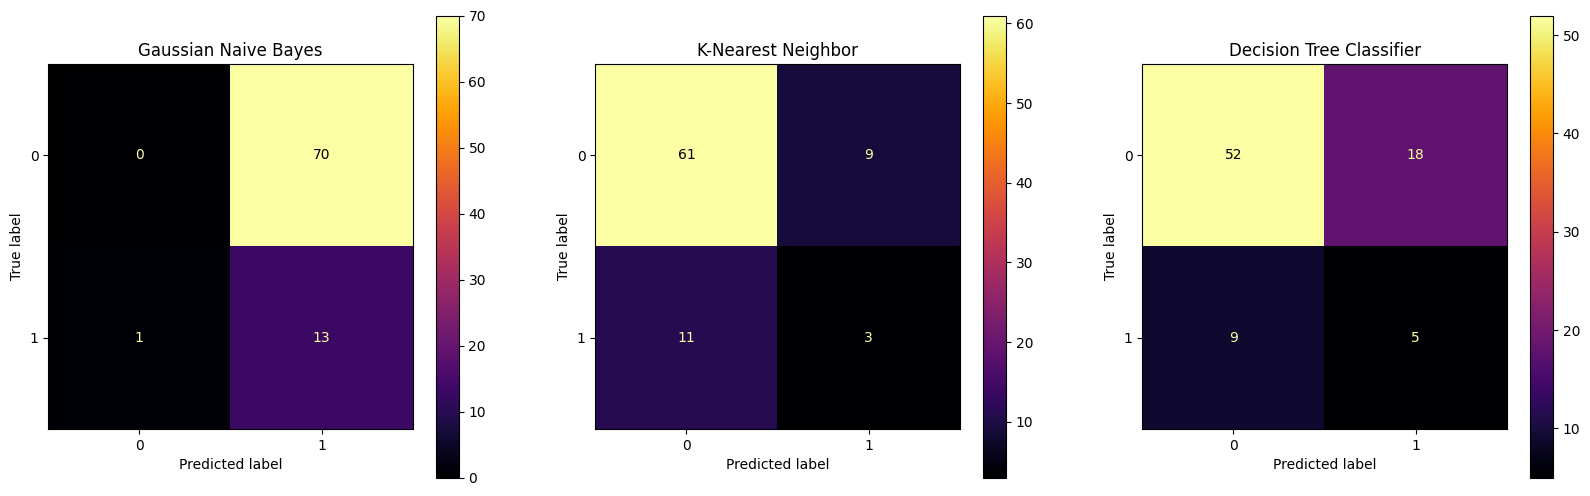

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='inferno')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='inferno')
knn_cm_display.ax_.set_title("K-Nearest Neighbor")

dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='inferno')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")

plt.show()

Berdasarkan confusion matrix diatas

GNB TP: 13  TN: 0 FP: 70 dan FN : 1

KNN: TP: 3 TN :  61 FP: 9 FN nya: 11

DTC: TP: 5 TN : 52 FP: 18 FN : 9

GNB memiliki jumlah False Positives (FP) yang sangat tinggi (70), menunjukkan bahwa model cenderung memprediksi hasil positif ketika seharusnya negatif.
KNN memiliki False Negatives (FN) yang cukup tinggi (11), menunjukkan bahwa model cenderung gagal memprediksi hasil positif yang seharusnya positif.
DTC memiliki tingkat kesalahan yang lebih seimbang, dengan jumlah False Positives (FP) dan False Negatives (FN) yang lebih rendah dibandingkan dengan GNB dan KNN.

In [22]:
from sklearn.metrics import confusion_matrix

def calculate_metrics(cm):
    tn, fp, fn, tp = cm.ravel()[:4]  # Mengambil hanya 4 nilai pertama
    accuracy = (tp + tn) / (tn + fp + fn + tp)

    if (tp + fp) == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)

    if (tp + fn) == 0:
        recall = 0
    else:
        recall = tp / (tp + fn)

    if (precision + recall) == 0:
        f1 = 0
    else:
        f1 = (2 * precision * recall) / (precision + recall)

    return accuracy, precision, recall, f1

predictions = [gnb_pred, knn_pred, dtc_pred]
models = ["Naive Bayes", "KNN", "Decision Tree"]

for i, pred in enumerate(predictions):
    cm = confusion_matrix(y_test, pred)

    accuracy, precision, recall, f1 = calculate_metrics(cm)

    print(f"\nMetrics for {models[i]}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")



Metrics for Naive Bayes:
Accuracy: 0.15
Precision: 0.16
Recall: 0.93
F1-score: 0.27

Metrics for KNN:
Accuracy: 0.76
Precision: 0.25
Recall: 0.21
F1-score: 0.23

Metrics for Decision Tree:
Accuracy: 0.68
Precision: 0.22
Recall: 0.36
F1-score: 0.27


Naive Bayes:

Akurasi (Accuracy): 15% - Model berhasil mengklasifikasikan hanya 15% dari keseluruhan sampel dengan benar.
Presisi (Precision): 16% - Dari semua prediksi positif yang dibuat oleh model, hanya 16% di antaranya adalah benar.
Recall: 93% - Model dapat mengidentifikasi 93% dari semua hasil positif yang seharusnya diidentifikasi.
F1-score: 27% - Rata-rata harmonik dari presisi dan recall adalah 27%.

K-Nearest Neighbors (KNN):

Akurasi: 76% - Model berhasil mengklasifikasikan 76% dari keseluruhan sampel dengan benar.
Presisi: 25% - Dari semua prediksi positif yang dibuat oleh model, hanya 25% di antaranya adalah benar.
Recall: 21% - Model dapat mengidentifikasi hanya 21% dari semua hasil positif yang seharusnya diidentifikasi.
F1-score: 23% - Rata-rata harmonik dari presisi dan recall adalah 23%.

Decision Tree:

Akurasi: 68% - Model berhasil mengklasifikasikan 68% dari keseluruhan sampel dengan benar.
Presisi: 22% - Dari semua prediksi positif yang dibuat oleh model, hanya 22% di antaranya adalah benar.
Recall: 36% - Model dapat mengidentifikasi 36% dari semua hasil positif yang seharusnya diidentifikasi.
F1-score: 27% - Rata-rata harmonik dari presisi dan recall adalah 27%.

## ROC/AUC

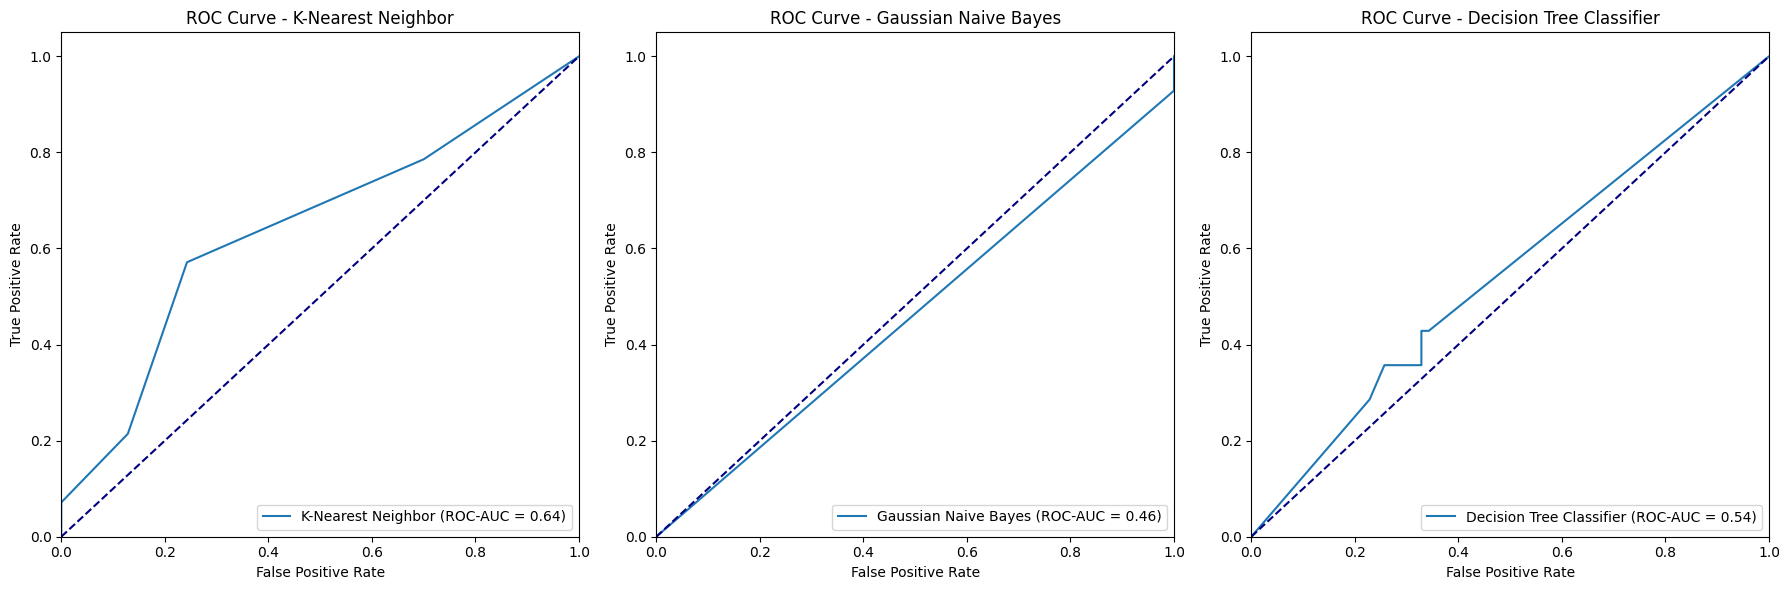

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    y_pred_proba = model.predict_proba(x_test_norm)[:, 1]  # Mengambil probabilitas kelas positif

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=2)  # Menggunakan pos_label yang sesuai dengan label target

    roc_auc = roc_auc_score(y_test, y_pred_proba)

    ax.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()



Grafik diatas menunjukkan performa tiga model klasifikasi, yaitu K-Nearest Neighbor (KNN), Gaussian Naive Bayes (GNB), dan Decision Tree Classifier (DTC), dalam membedakan kelas positif dan negatif.

KNN memiliki performa terbaik dengan AUC 0,64, diikuti oleh DTC dengan AUC 0,54, dan GNB dengan AUC 0,46.

# Review Process

## Validasi Silang

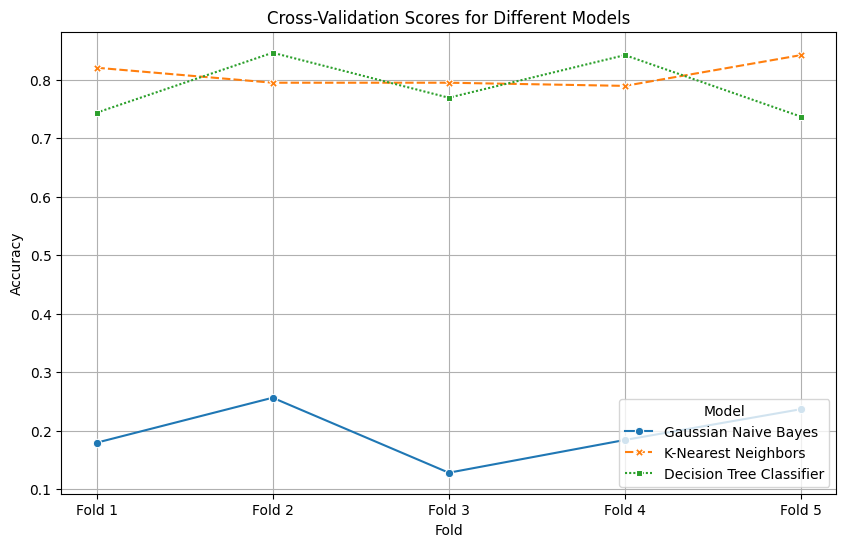

In [31]:
from sklearn.model_selection import cross_val_score


models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T


plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()


Berdasarkan Visualisasi diatas Algoritma yang paling baik dalam latihan permodelan selama 5 fold adalah

1. K-Nearest Neighbors (KNN)
2. Decision Tree Classifier (DT)
3. Gaussian Naive Bayes (GNB)

## Feature Selection

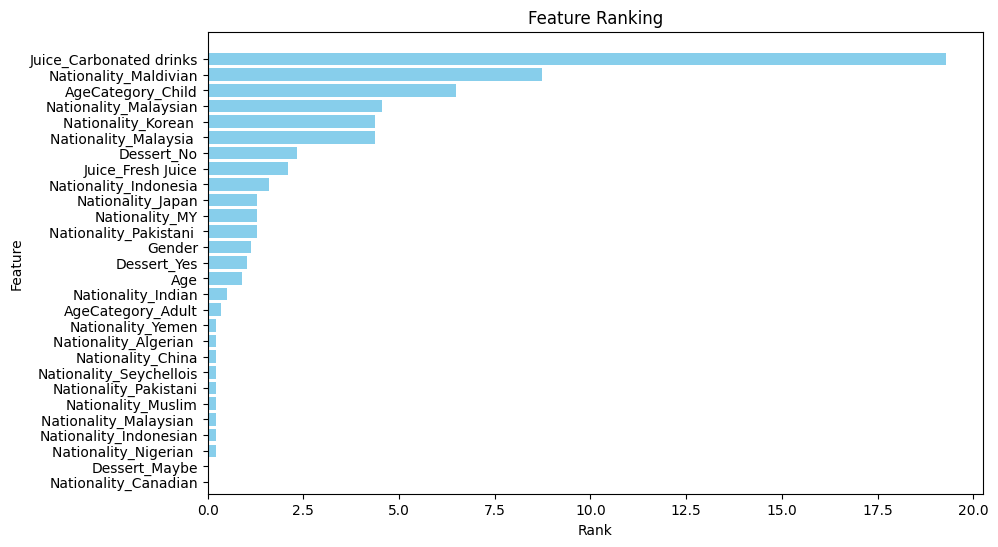

In [32]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

selector = SelectKBest(score_func=chi2, k=10)

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

ini adalah fitur ranking yang mengurutkan kolom mana yang paling berpengaruh pada model

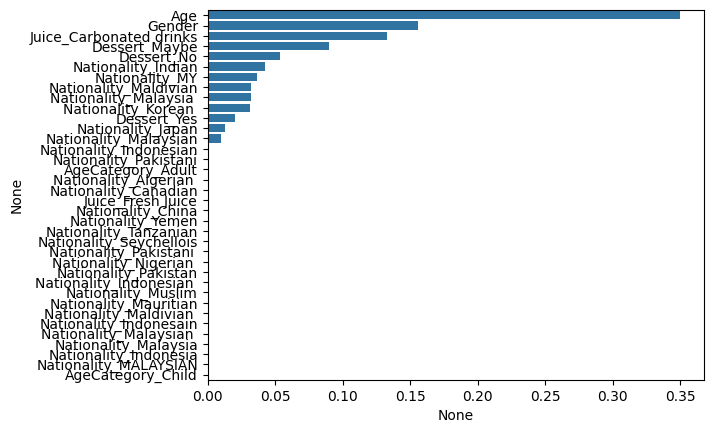

In [34]:
feature_imp = pd.Series(dtc.feature_importances_, index=x.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

ini adalah fitur ranking yang digunakan oleh model DTC

## Tuning Hyperparameter

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 0.43287612810830584}
Akurasi sebelum tuning: 0.15476190476190477
Akurasi setelah tuning: 0.8095238095238095


Hasil tuning parameter untuk model Gaussian Naive Bayes menunjukkan peningkatan yang signifikan dalam akurasi model. Sebelum tuning, akurasi model hanya sebesar 0.15, yang berarti model hanya dapat mengklasifikasikan sekitar 15% dari data uji dengan benar. Namun, setelah melakukan tuning parameter, akurasi model meningkat menjadi 0.81, yang berarti model dapat mengklasifikasikan sekitar 81% dari data uji dengan benar.

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


dtc = DecisionTreeClassifier()


acc_before_tuning = dtc.fit(x_train_norm, y_train).score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2', None]
}


grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

best_model = grid_search.best_estimator_

acc_after_tuning = best_model.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)


Akurasi sebelum tuning: 0.6785714285714286
Parameter terbaik: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}
Akurasi setelah tuning: 0.8333333333333334


Hasil akurasi sebelum dan sesudah tuning parameter untuk model Decision Tree Classifier adalah sebagai berikut:

Akurasi sebelum tuning: 0.6785714285714286
Akurasi setelah tuning: 0.8333333333333334

Sebelum tuning parameter, akurasi model Decision Tree Classifier adalah sekitar 67.86%. Ini berarti bahwa model tersebut dapat mengklasifikasikan sekitar 67.86% dari data uji dengan benar.

Setelah tuning parameter, terjadi peningkatan yang signifikan dalam akurasi model menjadi sekitar 83.33%.

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint


param_dist = {
    'n_neighbors': randint(1, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)

random_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", random_search.best_params_)


knn_default = KNeighborsClassifier()
knn_default.fit(x_train_norm, y_train)
y_pred_before_tuning = knn_default.predict(x_test_norm)
acc_before_tuning = accuracy_score(y_test, y_pred_before_tuning)
print("Akurasi sebelum tuning:", acc_before_tuning)


acc_after_tuning = random_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)


Parameter terbaik: {'n_neighbors': 14, 'p': 2, 'weights': 'distance'}
Akurasi sebelum tuning: 0.7619047619047619
Akurasi setelah tuning: 0.7380952380952381


Sebelum tuning parameter, akurasi model KNN adalah sekitar 76.19%. Ini berarti bahwa model tersebut dapat mengklasifikasikan sekitar 76.19% dari data uji dengan benar.

Namun, setelah tuning parameter, terjadi penurunan dalam akurasi model menjadi sekitar 73.81%. Hal ini menunjukkan bahwa parameter-parameter yang dipilih setelah proses tuning tidak menghasilkan hasil yang lebih baik daripada konfigurasi awal model. Sehingga tidak perlu diterapkan

# Determine Next Steps

kita memiliki tiga algoritma yang dievaluasi: Gaussian Naive Bayes (GNB), K-Nearest Neighbors (KNN), dan Decision Tree Classifier (DTC). Berikut adalah hasil akurasi sebelum dan sesudah tuning parameter untuk ketiga algoritma tersebut:

Gaussian Naive Bayes (GNB):

Akurasi sebelum tuning: 0.15476190476190477
Akurasi setelah tuning: 0.8095238095238095
K-Nearest Neighbors (KNN):

Akurasi sebelum tuning: 0.7619047619047619
Akurasi setelah tuning: 0.7380952380952381
Decision Tree Classifier (DTC):

Akurasi sebelum tuning: 0.6785714285714286
Akurasi setelah tuning: 0.8333333333333334
Berdasarkan hasil tersebut, kita dapat melihat bahwa algoritma Decision Tree Classifier (DTC) menghasilkan akurasi tertinggi setelah proses tuning parameter, yaitu sekitar 83.33%. Ini menunjukkan bahwa model DTC memiliki kinerja yang paling baik dalam mengklasifikasikan data uji.

Dengan demikian, untuk deployment, algoritma yang akan dipilih adalah Decision Tree Classifier (DTC). Hal ini disebabkan karena model DTC memberikan performa yang lebih baik dalam hal akurasi prediksi dibandingkan dengan algoritma lainnya setelah proses tuning parameter. DTC juga cenderung lebih mudah diinterpretasikan dan dijelaskan daripada beberapa algoritma lain, sehingga mempermudah dalam menjelaskan hasil prediksi kepada pengguna atau stakeholder.






